# Importing Libraries


In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset

In [3]:
# Read the yearly dataset
yearly_df = pd.read_csv('yearly_deaths_by_clinic.csv')
yearly_df

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


# Exploratory Data Analysis and Data Cleaning

In [ ]:
# shape of yearly_df
yearly_df.shape

(12, 4)

In [ ]:
# info of yearly_df ( to check data type)
yearly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 516.0+ bytes


In [ ]:
# summary of data
yearly_df.describe()

,year,births,deaths
count,12.000000,12.000000,12.000000
mean,1843.500000,3152.750000,223.333333
std,1.783765,449.078476,145.383089
min,1841.000000,2442.000000,66.000000
25%,1842.000000,2901.750000,100.250000
50%,1843.500000,3108.500000,219.500000
75%,1845.000000,3338.250000,263.500000
max,1846.000000,4010.000000,518.000000


In [ ]:
# check the missing values or null values
yearly_df.isnull().sum()

year      0
births    0
deaths    0
clinic    0
dtype: int64

There is no missing values

In [ ]:
# check clinicwise deaths
yearly_df.groupby('clinic')['deaths'].sum()

clinic
clinic 1    1989
clinic 2     691
Name: deaths, dtype: int64

From above results shows us the number of births and deaths in 2 clinic form the year 1841  till 1846. it's obvious that the number of deaths in clinic 1 is higher than that of clinic 2.

In [ ]:
# to make the analysis easiar, we can caluculate the proportion of deaths.
yearly_df['Proportion of Deaths']=yearly_df['deaths']/yearly_df['births']
yearly_df

,year,births,deaths,clinic,Proportion of Deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004


In [ ]:
# seperate the dataset into 2 datasets, one for each clinic
clinic_1 = yearly_df[yearly_df['clinic'] == 'clinic 1']
clinic_1

,year,births,deaths,clinic,Proportion of Deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


In [ ]:
# Average Death Rate in clinic  every  year
death_rate =(yearly_df['deaths']/yearly_df['births'])*100
death_rate

0      7.806324
1     15.759051
2      8.954248
3      8.235667
4      6.901489
5     11.446384
6      3.521704
7      7.596841
8      5.987587
9      2.300406
10     2.036409
11     2.797017
dtype: float64

In [ ]:
clinic_2 = yearly_df[yearly_df['clinic'] == 'clinic 2']
clinic_2

,year,births,deaths,clinic,Proportion of Deaths
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004
10,1845,3241,66,clinic 2,0.020364
11,1846,3754,105,clinic 2,0.027970


# Data Analysis and Visualizations

Text(0, 0.5, 'Deaths')

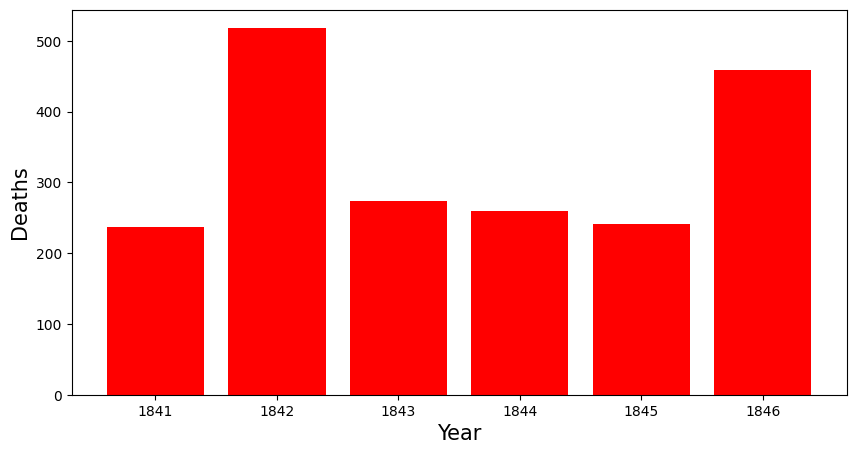

In [ ]:
# Visualiae the Number of deaths every year in clinic1
plt.figure(figsize=(10,5))
plt.bar(clinic_1.year,clinic_1.deaths,color='red')
plt.xlabel('Year',fontsize=15)
plt.ylabel('Deaths',fontsize=15)

Text(0, 0.5, 'Deaths')

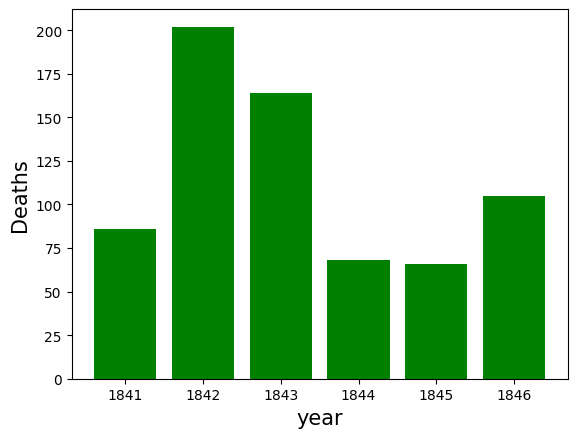

In [ ]:
# Visualize the number of deaths every year in clinic 2
plt.bar(clinic_2.year,clinic_2.deaths,color='green')
plt.xlabel('year',fontsize=15)
plt.ylabel('Deaths',fontsize=15)


From above 2 graph it seems that 1842 was a pretty hectic year in both clinic 1 & 2.

# plot the proportion of deaths in clinic 1 and 2

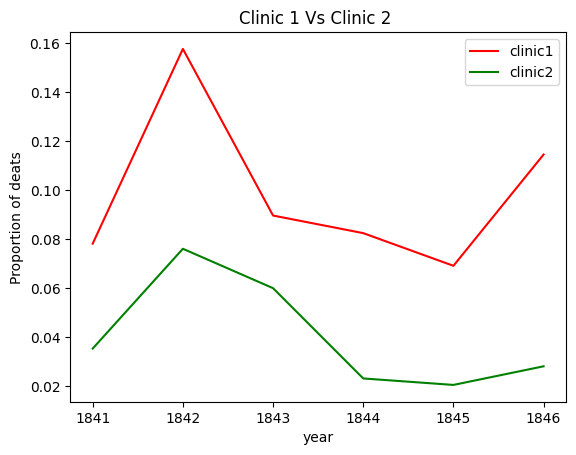

In [ ]:
plt.plot(clinic_1['year'],clinic_1['Proportion of Deaths'],color='red',label='clinic1')
plt.plot(clinic_2['year'],clinic_2['Proportion of Deaths'],color='green',label='clinic2')
plt.title('Clinic 1 Vs Clinic 2 ')
plt.xlabel('year')
plt.ylabel('Proportion of deats')
plt.legend()

By looking further into why this happened, Dr Semmelweis realised that many medical students worked at clinic 1 who also as a part of their study, spend a lot of time in the autopsy room. So, he realiaed that dealing with corpses spread bacteria that would be transferred to the women giving birth, infecting them with the deadly childbed fever, which was the main reason for the high mortality rates.

# Monthly Data

In [5]:
# Read monthly dataset
monthly_df=pd.read_csv('monthly_deaths.csv')
monthly_df

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


In [ ]:
monthly_df.shape

(98, 3)

In [ ]:
monthly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [ ]:
monthly_df['proportion of deaths']=monthly_df['deaths']/monthly_df['births']
monthly_df.head()

,date,births,deaths,proportion of deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


Dr Semmelweis ordered the doctors to wash their hands and made it obligatory in the summer of 1847 to see if that will affect the number of deaths, and since we have the  monthly data now, we can trace the number of deaths before and after the handwashing started.

In [ ]:
# change data type of 'date' col form object to datetime
monthly_df.dtypes
monthly_df['date'] = pd.to_datetime(monthly_df['date'])
monthly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  98 non-null     datetime64[ns]
 1   births                98 non-null     int64         
 2   deaths                98 non-null     int64         
 3   proportion of deaths  98 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.2 KB


In [ ]:
# point the date at which handwashing started to 'start_handwashing'
start_handwashing = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwahsing_start

before_washing = monthly_df[monthly_df['date'] < start_handwashing]
before_washing

,date,births,deaths,proportion of deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843
...,...,...,...,...
71,1847-01-01,311,10,0.032154
72,1847-02-01,312,6,0.019231
73,1847-03-01,305,11,0.036066
74,1847-04-01,312,57,0.182692


In [ ]:
after_washing = monthly_df[monthly_df['date']>=start_handwashing]
after_washing

,date,births,deaths,proportion of deaths
76,1847-06-01,268,6,0.022388
77,1847-07-01,250,3,0.012000
78,1847-08-01,264,5,0.018939
79,1847-09-01,262,12,0.045802
80,1847-10-01,278,11,0.039568
81,1847-11-01,246,11,0.044715
82,1847-12-01,273,8,0.029304
83,1848-01-01,283,10,0.035336
84,1848-02-01,291,2,0.006873
85,1848-03-01,276,0,0.000000


Before Handwashing

Text(0, 0.5, 'proportinon of deaths')

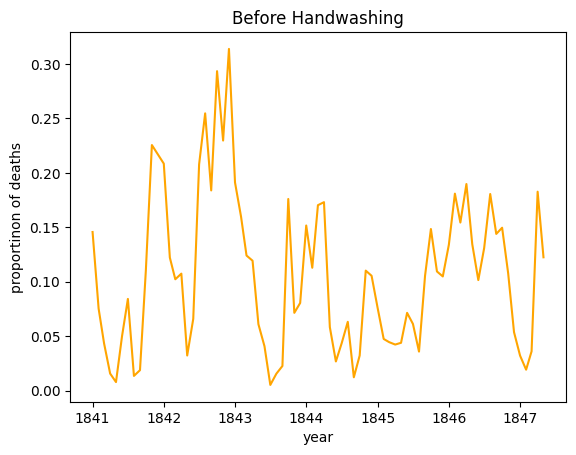

In [ ]:
plt.plot(before_washing['date'],before_washing['proportion of deaths'],color='orange')
plt.title('Before Handwashing')
plt.xlabel('year')
plt.ylabel('proportinon of deaths')

After Handwashing

Text(0, 0.5, 'proportion of deaths')

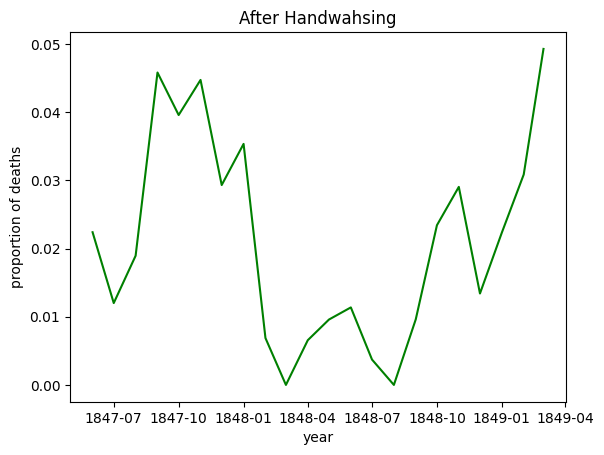

In [ ]:
plt.plot(after_washing['date'],after_washing['proportion of deaths'],color='green')
plt.title('After Handwahsing')
plt.xlabel('year')
plt.ylabel('proportion of deaths')

To see the difference clearly, let's combine the 2 plots in  one chart

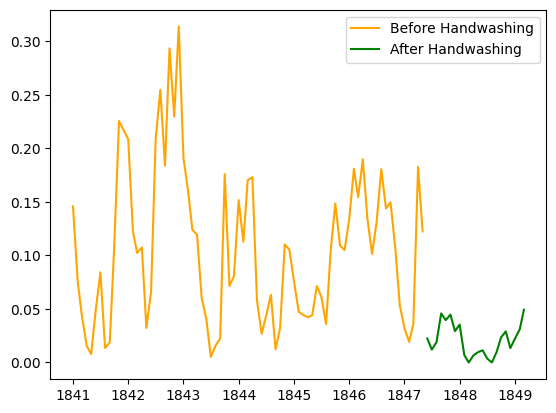

In [ ]:
plt.plot(before_washing['date'],before_washing['proportion of deaths'],color='orange',label='Before Handwashing')
plt.plot(after_washing['date'],after_washing['proportion of deaths'],color='green',label='After Handwashing')
plt.legend()

The difference is clear! the proportion of deaths dramatically decreased after handwashing was made obligatory.

Let's calculate exactly how much did handwashing decreased the porportion of deaths on average.

In [ ]:
before_proportion = before_washing['proportion of deaths']
after_proportion = after_washing['proportion of deaths']
before_proportion.mean()

0.10504998260908789

In [ ]:
after_proportion.mean()

0.021093375097254535

In [ ]:
# calculate the difference between both proportion
mean_diff = after_proportion.mean() - before_proportion.mean()
mean_diff

-0.08395660751183336

The minus sign indicate that there is a decrease. so handwashing decreased the proportion of deaths from 10% to 2% i.e, by approximately 8%.

# Result
Before the handwashing deaths possibilities are High and After the handwashing deaths possibilities are very low.